# <strong> Computational Photography <strong>

## Week 1

### <strong>Some of the Professor's Research:</strong>

- The profesor created a algorithm to turn an image into a simple 3-D scene. 
- Other research focused on turning images into 3-D scenes/ models. 
- Inserting objects into images, and making those pasted objects look like they were in the original photograph. 
- Generating videos based off of text input (comic strips).
- Creating 3D, AR models of construction sites (Reconstruct)

### <Strong> Some Context on Computational Photography </strong>

- Depictions of people and scenes have changed a lot over the last few thousands of years (from abstract, iconography - to realism)
    - shift to perspective, real-life scenes
<img src="./Arnolfini_Portrait.png" alt="Arnolfini's Portrait and Mirror">
- Then there was the camera: first used to help artists draw realistic scenes (the Lens Based Camera Obscura)
    - hard to learn to draw things as they are, vs how we perceive them
<img src="./Images_for_Notes/Daguerre.png" alt="Daguerre">
- But are photos really realistic?
    - photos can be staged (like the Iraqi photo, and touched up photos in magazines.)
    - this is where computer graphics come in. 
        - Model the 3D model of the scene
        - use a physics engine to render from any viewpoint
        - hard to do well
        - sometimes looks too shiny, too real
        - people are hard to do, pores, wrinkles, glow
- The realism spectrum
    - Computer Graphics:
        - easy to create new worlds
        - easy to manipulate objects/ viewpoints
        - very hard to make look realistic
    - Photography
        - instantly realistic
        - easy to aquire
        - very hard to manipulate objects/ viewpoints
- Computational photography = the best of both worlds
    - How can I use computational techniques to capture light in new ways?
    - How can I use computational techniques to breathe new light into the photograph?
    - How can I use computational techniques to synthesize and organize photo collections?


### <strong>Course Objectives</strong>

1. You will have new abilities for visual creation
2. You will get a foundation for computer vision
3. You will better appreciate your own visual ability 

<img src="./Images_for_Notes/Thinking.png" alt="Daguerre">

4. You will have fun doing cool stuff

### <strong>Course Projects</strong>


1. Hybrid images
    - Creating an image that has signal from 2 different images (different interpretation depending on the size of the image)
2. Image quilting for texture synthesis and transfer
    - being able to create texture in images (face on toast)
3. Poisson editing
    - Picture of swimming pool + picture of a bear = blended in bear into a swimming pool
4. Image-based lighting
    - capturing light with mirrored ball
5. Video alignment, sitching, editing
    - panoramic video insertion and deletion
6. Do something cool
    - should be about the same scale as the previous projects

### <strong>Pixel and Image Filters</strong>

- Image formation
    - digital camera records light into CCD (converts photons of light into electrons)
    - measuring the total number of photos that reach each cell
    - the original signal could be nice and continuous (curved), but is converted to discrete and blocky for the camera
    - this is why elements of images can be pixelated and noisy
    - Raster image
        - matrix representation of an image
        - one value per pixel of the image
    - Perception of intensity
        - humans can be tricked by our own visual system (checkerboard shadow example)
    - Digital Color Images
        - using filters, CCD's can record color based on intensity 
        - all images are just three colors with different intensities (RGB)

In [ ]:
# in python..

import cv2

im = cv2.imread(filename)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # orders channels as RGB
im = im / 255 # values range from 0 to 1

# RGB image im is a H x W x 3 matrix (numpy.ndarray)

im[0,0,0] # top left pixel value in R-channel
im[y, x, c] # y + 1 pixels down, x + 1 pixels to the right in the cth channel
im[H-1, W-1, 2] # bottom right pixel in the B channel

Image Filtering

- is the compute function of local neighborhood at each position
- Really important
    - enhance images
        - denoise, resize, increase contrast, etc
    - extract information from images
        - texture, edges, distinctive points, etc
    - detect patterns 
        - template matching
- box filter
    - looks like a box in 2D plot
    - a 3x3 matrix filter applied to an image means you take each 3x3 part of the image, and get the dot product of of each segment
- what does a filter do?
    - it sort of blurs out the image
    - smoothes
    - reduces contrast
    - convolution (?)
    - answer: takes the average of each window
-  You have to get the dot product of the filter and the segment of the image you are looking at. The segment of the image matches the filter image in terms of size.
- The resulting image is the same size as the original image, as the affected pixel during each round of the filtering operation is just the one in the middle. We handle the edges of the photo differently. 
- This process is called the filtering operation
- What different filters do
    - zero matrix with a 1 in the center?
        - does nothing, as every pixel gets replaced by itself. 
        - called the identity filter
    - A zero matrix (3x3) with a single one at position 23?
        - shifted to the left
    - Doubling the image (zero matrxi with 2 in the center), and then subtracting a box filter?
        - this is a sharpening filter
        - if you subtract a blurred image from a sharp image, you just get the sharper image
        - making the differences in pixel intensities STRONGER
    - Edge filter
        - [1, 0, -1
           2, 0, -2
           1, 0, -1]
        - gets the absolute value of an image
        - sum of pixels from the left and subtracting the pixels from the right
        - turning this filter horizontal makes a Sobel filter
- How can we synthesize motion blur?
    - shift the image by multiple positions and then average it out
    - How is this done with a filter?

In [ ]:
import cv2
import numpy as np

im_fn = './Thinking.png'

im = cv2.imread(im_fn)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)/255 # convert to grayscale for now

theta = 0
len = 15
mid = (len-1)/2

fil = np.zeros((len,len))
print(fil)

fil[:, int(mid)] = 1/len
R = cv2.getRotationMatrix2D((mid, mid),theta,1)
fil = cv2.warpAffine(fil, R, (len,len))

im_fil = cv2.filter2D(im, -1, fil)

%matplotlib inline
fig, axes = plt.subplots(3,1,figsize=(50,50))
axes[0] = imshow(im,cmap='gray')
axes[1] = imshow(im,cmap='gray')
axes[2] = imshow(im,cmap='gray')

Correlation vs Convolution

- different terms for filtering. 
- sometimes used interchangably
- strong relationship between them though
- correlation
    - when you take a window over the image, you multiply corresponding elements of the window with the kernel (filter matrix)
- convolution
    - same as correlation, but you rotate the kernel first by 180 degrees
    - calculated using fast fourier transforms
- if you can do correlation, you can also do convolution
- if you have a symetric kernel, the output will be the same

Key properties of linear filters

- linearity
    - if you filter the sum of two signals, that is the same as filtering each separately and adding those responses together
- shift invariance
    - same behavior regardless of pixel location
    - filter(shift(f)) = shift(filter(f))
    - any linear shift invariant operator can also be represented as a convolution
- cummutative
    - a * b = b * a
    - conceptually not difference between filter and signal (image)
    - I could also filter my blur kernel with my image, and I get the same result. This is unlike matrices of linear algebra
- associative 
    - a * (b * c) = (a * b) * c
    - often apply several filters one after another
    - this is equivalent to applying one filter
- distributes over addition 
    - a * (b + c) = (a * b) + (a * c)
- scalars factor out
- identity filter is a filter with a 1 in the center

Important filter: Gaussian

- 4 representations as depicted in the lecture
- effective smoother without edgey artifacts (compared to box filter)
- remove "high frequency" components from the image (low pass filter)
    - images become more smooth
- if you convolve a gaussian with another gaussian you get another gaussian. (Ring a bell from stats? Normal distribution + normal distribution = normal distribution)
    - convolving twice with a gaussian kernal of width sigma is the same as convolving once with a kernel of width sigma * radical 2. 
- separable
    - you can divide it into a product of two 1-D Gaussians

Separability 

To summarize what the professor said here, separability just describes the fact that we can split our filter into smaller filters. The example given was splitting a 3x3 filter into the two 1x3 and 3x1 filters that could be multiplied to produce it. Using these two to convolve on the image instead of the larger 3x3 matrix is much faster for larger matrices. 

Some practical matters

- How big should a filter be?
    - values at edges should be near zero
    - rule of thumb for Gaussian: set kernel half-width to >= 3*sigma (since Gaussian is not discrete and can't be zero)
    - this just says that if the standard deviation of the pixel values is 1, then we want the size of the filter to be 7 by 7 (3 sigma is 3, so we want 3 on one side, 3 on the other, 1 value in the middle)
    - too small of a size on the Gaussian results in what is essentially the box filter
- What about near the edge?
    - the filter window falls off the edge of the image
    - need to extrapolate - aka making the image larger such that our filter can fit.
    - methods (all can be done in Python)
        - clipping (black filter around the whole image)
        - wrap around 
        - copy edge
        - reflect across edge (DEFAULT)
    - What is the size of the output?
        - full (response is the size of original image plus what we extrapolated)
        - same (response is the size of original image) (DEFAULT)
        - valid (original image does not get padded at all, just record response where filter fits)


Application Representing Texture

- regular or stochastic patterns caused by bumps, grooves, and/ or markings
- How can we represent texture?
    - computre respones of blobs and edges at various orientations and scales
    - filter bank = set of filters
    - we can apply multiple filters to an image and measure the responses of each one to see how much of an impact that filter made on the image
    - the result is a vector to describe the image
        - this tells us something about the texture of the image
        - for example, what would it mean if we saw there was a high response to verticle filters in an image, low responses to horizontal filters, and low responses to blob filters (blob meaning what it sounds like, organic circular looking patterns)?
            - probably means we have an image with a vertical looking texture

Hybrid Images (Project 1)

- a way of combining two images so that you get a different perception of the image depending on your distance to the image
- Gaussian filtered image (smooth image) + laplacian filtered image (detail image) = hybrid image
- far away and small = blurred image
- close and large = detail image

Summary

- images are a matrix of numbers
- linear fitering is the dot product at each window position of the image with the filter (kernel)
- be aware of details (size of filter, extrapolation, cropping)

## Week 2

- Fourier transform and frequency domain
    - another way to look at images
    - frequency view of filtering
    - another look at hybrid images
    - sampling
- Why does the Gaussian give a nice smooth image, but the box filter gives edgey artifacts?
    - hard to understand from the spacial domain, easier with frequency domain
- Why does we get different distance-dependent interpretations of hybrid images?
    - also answered in the frequency domain
- Why does a lower resolution image still make sense to us? What do we lose?

### <strong> Jean Baptiste Fourier </strong>

- Crazy idea
    - any univariate function can be rewritten as a weighted sum of sines and cosines of different frequencies
    - Laplace, Lagrange, Poisson were the judges
        - not impressed
    - his work was not even translated to english until 70 years later
- Idea: you can compose a signal out of sines and cosines
    - Amplitude * sin((frequency * x) + phase)
    - convergence on the square wave with enough smaller frequencies added
- We often think of frequencies in terms of music
    - pitches
- images are usually looked at in the spacial domain, but we can also look at them with frequencies
- in two dimensions:
    - fourier images are always symetric about the origin 
    - dots close to center = low frequency, slow change
    - dots farther away = higher frequency, faster change
    - signals can be composed and added together just like in the spacial domain
- Fourier transform
    - stores the  magnitude and phase at each frequency
        - magnitude encodes how much signal there is at a particular frequency
        - phase encodes spatial information (indirectly) - how sine and cosines are shifted
- can compute a few ways, including Euler's formula
- can compute the transform as an integral (continuous) or as a sum (discrete)
- Fast Fourier transformation is what we use
- The Convolutional Theorem
    - why it works
    - the Fourier transform of the convolution of two functions is the product of their Fourier transforms
        - F[g * h] = F[g]F[h]
    - the inverse Fourier transform of the product of two Fourier transforms is the convolution of the two inverse Fourier transforms
        - F inverse [gh] = F inverse [g] * F inverse [h]
    - what does this mean?
        - <strong>Convolution in the spacial domain is equivalent to multiplication in the frequency domain </strong>
- Properties of Fourier Tranforms
    - linearity
    - the Fourier transform of a real signal is symmetric about the origin
    - The energy of the signal is the same as the energy of its Fourier transform

### <strong> Filtering with FFT </strong>

<img src="./Images_for_Notes/Filtering_FFT.png" alt="FFT Filtering">


In [ ]:
# Filtering with FFT in Python

import matplotlib.pyplot as plt
import numpy as np

def filter_image(im, fil):
    # im: H x W floating point numpy ndarray representing image in grayscale
    # fil: M x M floating point numpy ndarray representing 2D filter

    H,W = im.shape
    hs = fil.shape[0] // 2                          # half of filter size
    fftsize = 1024                                  # should be order of 2 (for speed) and include padding
    im_fft = np.fft.fft2(im, (fftsize,fftsize))     # 1) fft im with padding
    fil_fft = np.fft.fft2(fil, (fftsize, fftsize))  # 2) fft fil, pad to same size as image
    im_fil_fft = im_fft * fil_fft                   # 3) multiply fft images
    im_fil = np.fft.ifft2(im_fil_fft)               # 4) inverse fft2
    im_fil = im_fil[hs:hs + H, hs:hs + W]           # 5) remove padding
    im_fil = np.reak(im_fil)                        # 6) extract out real part
    return im_fil

In [ ]:
# Displaying with fft

import matplotlib.pyplot as plt
import numpy as np
def display_frequency_image(frequency_image):
    '''
    frequency_image: H x W floating point numpy ndarray representing image after FFT

    in grayscale

    '''
    shifted_image = np.fft.fftshift(frequency_image)
    amplitude_image = np.abs(shifted_image)
    log_amplitude_image = np.log(amplitude_image)
    fig = plt.figure()
    plt.imshow(log_amplitude_image, cmap='gray')
    plt.show()

<strong> Which has more information, the phase or the magnitude? </strong>

- magnitude = amount of power in frequencies
- phase = how they are shifted

In [ ]:
# Compute FFT and decompose to magnitude and phase
im1_fft = fft2(im1);
im1_fft_mag = abs(im1_fft);
im1_fft_phase = angle(im1_fft);
im2_fft = fft2(im2);
im2_fft_mag = abs(im2_fft);
im2_fft_phase = angle(im2_fft);
# Combine mag and phase from different images and compute inverse FFT
mag1_phase2 = ifft2(im1_fft_mag.*cos(im2_fft_phase)+1i*im1_fft_mag.*sin(im2_fft_phase));
phase1_mag2 =ifft2(im2_fft_mag.*cos(im1_fft_phase)+1i*im2_fft_mag.*sin(im1_fft_phase));

- phase contains more information it would appear

### <strong> Answering some questions </strong>


- so why does the Gaussian give smooth images and the box gives edgey artifacts?
    - The gaussian preserves information only in the low frequencies
    - The square does the same, but also in some isolated spots of higher frequency. These spots cause the artifacts
- Why does lower resolution still make sense to us, and what do we lose?
    - in all the natural image frequency plots we saw, power is always really concetrated in the lower frequencies (a red dot in the center, meaning there is a lot of power in the low freqs, while blue out towards the rest of the plot indicating not much power)
        - AKA: this means there is not a lot of change as you go from a pixel to its neighbors 
            - images are mostly smooth
        - what you lose is the high frequency information, but there is not a lot to begin with, so therefore we keep a lot of the useful information 
- How do you shrink an image?
    - Naively, you might think you could just throw away every other row and column (to reduce by a factor of two)
        - This causes an aliasing problem
            - can be dangerous and cause artifacts
                - wagon wheels rolling in the wrong way in movies
                - checkerboards disintegrate in ray tracing
                - striped shirts look funny on color tv
    - Nyquist-Shannon Sampling Theorem
        - when sampling a singal at discrete intervals, the sampling frequency must be >= 2 x f_max
        - f_max = max frequency of the input signal
        - This will allow you to reconstruct the original perfectly from the sampled version
    - anti-aliasing
        - sample more often (doesn't achieve downsampling goal really)  
        - OR, get rid of all frequencies that are greater than half the new sampling frequency
            - will lose information
            - but it is better than aliasing
            - apply a smoothing filter
        - Algorithm
            - start with image
            - apply low pass filter (Gaussian)
            - sample every other pixel
- Why does a lower resolution image still make sense to us? What do we lose?
    - because it preserves low frequency (make sure you apply a low pass filter)
- Why do we get different, distance-dependent interpretations of hybrid images?
    - Early processing in humans filters for various orientations and scales of frequency
    - perceptual cues in the mid frequencies dominate perception
    - when we see an image from far away, we sare basically subsampling it
        - thus, we don't have access to high frequencies (or even mid frequencies)
    - Hybrid image = low passed image + high passed image

### <strong> Summary </strong>

- sometimes it makes sense to think of images and filtering in the frequency domain
    - Fourier analysis
- can be faster to filter using FFT for large images (N LogN vs N^2 for auto-correlation)
- Images are mostly smooth
    - basis for compression
- remember to low-pass before you down sample

### <strong> Templates and Image Pyramids</strong>

- applications of filtering
- Template matching
    - useful for object recognition
        - how would we find an eye in the image?
            - evaluate whether or not our eye filter (the representation of the eye) matches the segement of the inage it is on
    - correlation
        - just take the eye patch as a filter, and compute the filter response
            - resulted in a fuzzy image instead of clear eyes and blury elsewhere. WHy?
                - can partly fix this by subtracting the filter mean intensity. Results in a mostly black image with a couple of detections where eyes could be. False detections included
        - could use the sum of squared difference
            - take the template, and scan it over the image
            - at each position, take the difference between the corresponding pixels and the template
            - square those values and sum them 

<img src="./Images_for_Notes/Matching_w_filters.png" alt="Filtering">

- SSD requires that you have an exact match in contrast and intensity
- normalized cross correlation

<img src="./ncc.png" alt="NCC">

- makes it so that any value added to the image (constant in frequency, intensity), then it gets canceled out
- best method to use?
    - it depends:
    - for zero mean filter
        - fastest, but not good matcher
    - SSD
        - next fastest
        - sensitive to overall sensitivity
    - Normalized cross corelation
        - slowest
        - cannot be implemented with linear filters, because you are subtracting a different mean value for each image patch
        - but it is invariant to local average intensity and contrast


### <strong> Template matching at scale </strong>

- what if we want to detect larger or smaller eyes?
    - image pyramid
- Review of sampling
    - means I am extracting out every other pixel or a subset of the pixels to create a lower resolution image
    - first do a smoothing filter to kill off high frequencies that won't be preserved anyway
    - then sample from that filtered image
- Doing this iteratively creates a Gaussian pyramid
    - then, run this set of images (all different scales) against the image to find different sized objects
- there is also the Laplacian pyramid
<img src="./Images_for_Notes/laplacian.png" alt="Laplacian Pyramid">


### <strong> Coarse-to-fine Image Registration </strong>

Basic Idea

1. Compute Gaussian pyramid
2. align with coarse pyramid
    - find minimum SSD position
3. Successively align with finer pyramids
    - search small range centered around position determined at coarser scale

<img src="./Images_for_Notes/ctf.png" alt="ctf">


What is this saying? Basically, we can use the smaller image (with less area to search) to locate things, and then project that up on each level of our pyramid, only having to search a small area around where our last estimate was. 

Why is this faster?
    - you only need to search a small range of values in finer resolution images. Just match the coarse image and then project that using your last estimate
    - you are not guaranteed to get the same result if the pattern in high resolution is noticable, but less so in the coarse image
    - it can actually help you locate the area better because high frequencies are more prone to noise that could be wrong but provide a correct signal. 

### <strong> Denoising, Compression </strong>

- Can you align the images using the FFT?
    - yes, in the same way that you can do linear filtering with FFT
- How is it that a 4MP image can be compressed to a few hunred KB without a noticeable change?
    - as we know, most of the intensities are in the lower frequencies. Compressing removes the high frequencies
    - JPEG compression
        - Lossy image compression
        - Idea: extract 8x8 patches in the image and compress them independently using discrete cosine transform
            - basis - set of basis functions for the 8x8 patch
            - the first coefficient B(0,0) is the DC component, the average intensity
            - the top left coefficients represent low frequencies, the bottom right, high frequencies
            - Compression
                - quantize
                    - more coarsely for high frequencies (which also tend to have lower values)
                    - many quantized high frequency values will be zero
                - encode
                    - can decode with inverse dct
        - Summary
            - convert image to YCrCb
            - subsample color by factor of 2
                - people have bad resolution for color
            - split into blocks (8x8 typically), subtract 128 (so average intensity is closer to 0)
            - For each block
                - compute DCT coefficients
                - coarsely quantize
                    - many high frequency components will become 0
                - encode (with Huffman coding, for example)
    - PNG compression
        - lossless, can exactly get back original signal
        - main idea
            - predict a pixel's value based on uper left neighborhood
            - store difference of predicted and actual value
            - pkzip it (DEFLATE algorithm)
        - works well with a small number of images
- Denoising
    - additive Gaussian noise
        - denoised with a Gaussian filter
    - reducing salt-and-pepper noise by Gaussian smoothing does not really work
        - reduced/ removed with median filtering (outliers are removed)
    - median filtering
        - returns the median value of the local neighborhood
        - operates over a window by selecting the median intensity in the window
        - nonlinear: sorting is not linear
        - Median filtering is much more robost to Outliers compared to Gaussian
        - not ideal for Gaussian noise, but good for removing noise but preserving edges
    - weighted median
        - pixels further from center count less
    - clipped mean (average, ignoring few brighteset and darkest pixels)
    - Bilateral filtering 
        - third most important after Gaussian filter and Median filter
        - weight by spatial distance (distance from center, like the Gaussian) AND intensity difference
        - will simply check what other pixels are similar to the center pixel, those get more weight, as well as the pixels that are close to the center pixel (USE THIS ONE)

## Week 3

### <strong> Light and Color and the Eye </strong>

- the color we perceive is a function of multiple factors
    - material
    - geometry
    - light source
- the eye
    - cameras are built to get light in a similar way to the eye
    - the human eye is a camera
        - iris
            - colored annulus with radial muscles
        - pupil
            - the hole (aperture) whose size is controlled by the iris
        - retina
            - the "film"
            - area on the back filled with rods and cones
        - cones
            - cone-shaped
            - less sensitive
            - operate in high light 
            - color vision
        - rods
            - rod shaped
            - highly sensitive
            - operate at night
            - gray-scale vision
            - slower to respond
    - eyes can deal with several orders of magnitude of intensity
    - cones = daylight
    - rods = moonlight
    - distribution of rods and cones
        - cones spike at about 0 degrees
        - only a small range of angles where we have a lot of cones
            - meaning we have high resolution of image in only a location of where we look
    - rod distribution
        - broader distribution
        - rods are more sensitive off center of our vision
- the electromagnetic spectrum
    - we see between 400 and 700 nanometers (400 is red, 700 is blue)
- the physics of light
    - represented with a spectrogram
        - intensity of light that is received at each wavelength of light
    - laser
        - monochromatic
    - normal daylight
        - large range of the visible spectrum
        - white = roughly even across
        - yellowish = more skewed towards higher spectrum colors
    - metamers
        - different white flowers can have different spectrums of light
            - we only perceive a single color, not the whole spectrum
    - physiology of color vision
        - 3 kinds of cones
            - short (blue)
            - medium
            - long (red)
        - more cones are red and green than blue
        - medium and long cones have peaks at similar wavelengths
            - because human eyes evolved to see more colors of green (plants) and red (fruit)
        - why do we have 3 cones?
            - 3 is better than 2
            - more cones = better able to differentiate patters of light
            - more cones = worse in darkness
        - M and L on the X chromosone
            - men are more likely to be colorblind 
        - Women are more likely to be telechromatic (see color spectrums better)
        - why dont' we perceive a spectrum (or even RGB)?
            - we perceive
                - hue: mean wavelength, color
                - saturation: variance, vividness
                - intensity: total amount of light
            - same perceived color can be recreated with combinations of three primary colors (trichomacy)
        - trichromacy
            - theres a small amount of wavelengths not represented by RGB
            - CIE-XYZ
                - matrix multiplication on RBG intensities (XYZ)
        - consequence:
            - we can display every wavelength perfectly with RGB monitors
            - you can reproduce the same pattern of light in our perception using just 3 receptors
        - Bayer grid
            - put a set of filters in front of the photoreceptor cells
                - each pixel measures amount of red or blue or green light
                - each cell gets a range, peak will be in red  blue or green
            - since eyes have more green and red, so does the Bayer grid
        - alternative to Bayer
            - RGB + W

### <strong> How is light reflected from a surface? </strong>

- Depends on
    - illumination properties: wavelength, orientation, intensity
    - surface properties: material, surface orientation, roughness, etc.
- Lambertian surface
    - some light is absorbed (function of albedo)
    - remaining light is reflected in all directions (diffuse reflection)
    - examples: soft cloth, concrete, matte paints
- Diffuse reflection
    - intensity DOES depend on illumination angle because less light comes in at oblique angles
    - this explains why two surfaces of a building are different colors
        - the side more directly facing the light source is brighter
        - in this case, differences in intensity tell us about the rectangular shape of the building
    - the perceived intensity does NOT depend on the viewer angle
        - amount of reflected light propertional to cos(theta)
        - visible solid angle also proportional to cos(theta)
- specular reflection
    - direct reflection 
    - mirrors are fully specular
        - light does not scatter when hitting a mirror. It just reflects at the given angle
    - specularities = bright spots on a shiny object
        - easter eggs or hardwood floor reflection
- BRDF: bidirectional reflectance distribution function 
    - allows us to model completely how a surface reflects light
    - given the direction that the light came into a surface, and the direction light is emmitted from the surface
        - given orientation of the surface
            - and wavelength of light
                - what fraction of light will be reflected? This answers the question
- more complex effects
    - transparency
    - refraction
    - flourescence
    - phosphorescence
    - subsurface scattering
    - interreflection
- The color of objects
    - the color of the light source
    - the color of the surface
- Color constancy
    - we want to know that the reflection function of the object is, or its light with a white light
    - we don't want to know the RGB value
- Shadows
    - a point that can't see the source at all is "in shadow"
    - for point sources, the geometry is simple
    - shading and shadows give major cues to shape and position
- Summary
    - light has a spectrum of wavelengths
    - observed light depends on 
        - illumination intensities
        - surface orientation
        - material (albed, specular component, diffuse component)
    - every object is an indirect light source for every other
    - shading and shadows are informative about shape and position

### <strong> Color Spaces </strong>

- RGB is the default space
    - some drawbacks
        - strongly correlated channels
        - non-perceptual
            - we don't look at a color image and think about %'s of red, green, or blue
- More perceptual color spaces
    - XYZ covers all natural light, RGB covers most
    - XYZ is the basis for other spaces
    - perceptual uniformity
        - the idea is to try to represent color in a way so that the distance between colors (in vector representation of that color) corresponds roughly to the perceptual distance between the colors
        - measured by asking people to tune two colors to make them the same
        - used to make the CIE L*a*b* space
            - perceptually uniform color space
            - more meaningful perceptually as it is 
            - L channel: luminance
            - A channel: difference between red and gree
            - B channel: difference between yellow and blue
        - lumincance = brightness
        - chrominance = color (2 of these in LAB)
        - more information in intensity than in color
    - HSV
        - hue saturation and value
            - hue: color of the rainbow
                - non linear function of RGB space
            - saturation: brightness of the color
                - non linear function of RGB space
            - value: high value is bright, low value is dark
                - intensity image
        - not the easeiest to work in
            - cyclical 
    - YCbCr
        - used by tv communication
        - good for compression
        - similar to LAB (1 lum, 2 chrom channels)
        - can be computed with a linear operation
            - just a matrix operation

### <strong> Color balancing </strong>

- important ideas
    - typical images are gray on avaerge; this can be used to detect distortions
    - larger differences are more visible, so using the full intensity range improves visibility
    - it's often easier to work in non-RGB color space (convert to YCrCb first and imcrease the Y channel, maybe)
- linear adjustment
    - easy way to balance color
    - multiply R, G, and B channels by some constant
        - multiply all elements in that channel (matrix multiplication)
    - how do we chose constants?
        - pick ones that do not change overall intensity
            - some get smaller, some get larger
            - use the gray world assumption: the image average should be gray
        - white balancing
            - choose a reference as the white or gray color (see demo)
    - better to balance in camera's RGB (linear) than display RGB (non-linear)
- tone mapping
    - typical problem: compress values from a high range to a smaller range
        - most cameras do this
        - camera captures 12-bit linear intensity and needs to compress to 8 bits
    - challenge: there are some really bright parts and some really dark parts
        - we want to see the contrast in both parts
        - solution: do a non-linear mapping
            - Reinhart operator
            - take the luminance in the world divided by 1 + luminance in the world
                - small values are preserved, and the large values are compressed a larger and larger rate 
                - really compressed bright values, less so on darker ones
- point processing
    - apply a function on each pixel intensity to map it to a new value
    - gamma adjustment
        - for every pixel value, the gamma adjustment is just that pixel raised to a value gamma
            - values need to be between 0 and 1 first
            - low gamma = brighter
            - higher gamma = darker

### <strong> Histogram Equalization </strong>

- what if we have an image where our image has parts that too dark and too bright, or gamma values squished in the middle
- histogram equalization 
    - a method to remap intensity values so that values use the full range of the image as much as possible
- histogram
    - count of how many values are observed in a vector
- cummulative histogram
    - cummulative sum of a histogram
    - sum of all values less than or equal to a given value
- algorithm
    - given an image with pixel values from 0 to 255, specify a function that remaps pixel values, so that new values are more broadly distributed
    - first, compute the cumulative histogram
    - f(i) will then be getting the percentile of the intensity value * 255. multiply by alpha to do some balancing between the original image and the new image. 
        - alpha = 1 is just the histogram equalization
    - alpha is just how strong of an effect you want from the histogram equalization
- locally adaptive histogram equalization
    - just do normal HE but in different grid cells of the image
    - assign a given pixel a weighted average value with more weight on local grids
- what about HE in color?
    - you don't want to apply to RGB channels
        - it will apply them separately and give a weird color shift
    - first, break down the image into a luminance channel, and chrominance channels
    - perform locally adaptive HE on the luminance channel
    - then, just hsv2rgb to convert the chrominance channels back to RGB
    - kind of looks like it might be overdoing it, adds new shadows unless you average with original image


## Week 4

### <strong> Texture Synthesis </strong> 

- New section of topics called "the digital canvas"
    - cutting pasting warping filling blending
- Texture synthesis
    - taking a pattern and generating more of it
- hole filling
    - process of filling in the background behind holes in images 
- Texture
    - depicting spacially repeating pattersn
    - appear naturally and frequently
- goal of texture synthesis
    - create new samples of a given texture
    - many applications
        - virtual environments
        - hole filling
        - texturing surfaces
- The challenge
    - some patterns are highly structured, and some are more stochastic
        - a plaid shirt vs tile floor vs clouds (white noise)
- One idea: build probability distributions
    - thought: if you can model how the textures vary locally, then you can regenerate that image according to that model
    - Basic idea:
        - compute statistics of input texture
        - generate a new texture that keeps those same statistics
    - problem: it just doesn't work very well
        - hard to model using probability 
        - works well for smaller repeating textures
        - harder for longer repeating ones (like marble)
- other idea: instead of trying to explicitly model the probabilty distribution of intensities, just sample from the image
    - represent the texture empiraclly by just sampling different patches from that texture
    - first, make a Markov assumption: every pixel is independent of all the other pixels given its neighborhood
    - so, if we want to find what intensity should be at position p, then we should search the input image for all similar neighborhoods
    <img src="Images_for_Notes/brick.png" alt="brick">
- Idea is from Shannon (information theory)
    - generate English-sounding sentences by modeling the probability of each word given the previous word
    - large n will result in more structured senetences, but these sentences are more predictable as there may be less instances to pull from in training, resulting in the same word appearing every time
- This in in natural language, but it is a similar idea to the image application
    - instead of a set of words, we model a set of pixels
    - How do we match the patches? In other words, how do we find the patch in the image that we will use to pull a sample from (similar patch)?
        - Gaussian SSD
            - basically says we care a lot about the pixels near the pixel we are trying to match, and we care a little about the ones farther away
    - what order to fill in the new pixels?
        - onion skin order
            - pixels with the most neighbors are synthesized first
        - to synthesize from scratch, start with a randomly seleted small patch from the source texture
    - how big should patches be?
        - depends
        - <img src="./Images_for_Notes/circles.png" alt="circle">
        - basically, the smaller the patch, the more stochastic (random) your texture
        - larger would be more ridgid and repeated
- Texture synthesis algorithm
    - While image not filled in
        - get unfilled pixels with filled neighbors, sorted by the number of filled neighbors
        - basically, take all the pixels that you want to fill, put them in a queue, and their priority in that queue is based on how many neighbors are already filled
            - then pop off top pixel of the queue
                - extract the patch around this pixel
                - locate the top N patch matches from the input image
                    - then, randomly choose one of these N matches
                    - copy the intensity of the center of that patch to fill in the pixel



### <strong> Hole-Filling </strong> 

- goes from outside in in stages
- Extrapolation
    - increase the size of an image
    - very simple algorithm
        - but able to reproduce patterns well
- In-painting natural scenes
    - there may be structures in the image that you want to preserve
    - the onion filling order can sometimes fail here..
    - Order of filling matters
    - gradient-sensitive works better (think of the triangle example)
        - give more weight that are part of continuous lines
    - Filling order
        - fill a pixel that..
            1. Is surrounded by other known pixels
            2. is a continuation of a strong gradient or edge 
    - Summary
        - the Efros and Leung texture synthesis algorithm
            - very simple
            - surprisingly good results
            - synthesis is easier than analysis
            - ..but very slow
- Image Quilting (Efros and Freeman)
    - next iteration on texture synthesis
    - observation
        - neighbor pixels are highly correlated
    - Idea: unit of synthesis = block
        - exactly the same but now we want P(B | N(B))
        - much faster: synthesize all pixels in a block at once
    - but of complication in blending patches together
        - random placement of blocks leaves lots of seams
        - neighboring blocks constrained by overlap still creates some seams
        - minimal error boundary cut
            - best way to prevent seams
            - basic idea: you want to cut through the pixels that are similar in the two blocks to make a seamless transition between the two
            - solving for minimum cut path
                - represent it as a graph and find the shortest path through the graph
                - Use Djikstra's, O(m), where m is the number of columns in the image

### <strong> Texture Transfer </strong>

- Like trying to explain one object with bits and pieces of another object
- combine a potato with an orange
- compose a face out of a bread texture
- Idea is extremely similar to image synthesis in general, but with an extra guidance function
    - we want to match with a target image
    - take target image, convert to grayscale
    - take texture, grayscale and blur
    - generate a new texture such that the overlapping patches of the texture match well, but also the blurred luminance matches the blurred luminance of the input image
        - darker around darker areas of face, lighter near lighter areas
- source texture should have a range of intensities 
- PatchMatch
    - more efficient search
        - randomly initialize matches
        - see if neighbor's offsets are better
        - randomly search a local window for better matches
        - repeat 3, 4 across image several times
- Related Idea: image analogies
    - turn an image into a more painted version of itself
    - idea: define similarity between A and B
        - a patch from A is similar to a patch from B if they have similar luminance values
        - for each patch in B, find a patch that matches A who's corresponding match in A' also fits well with existing patches in B'
        - algorithm is done iteratively, coarse to fine
- Pix2Pix
    - image to image translation
    - very general method
    - finds patches similar from its training data to fill in result
    - 2 guiding principles
        - supervised objective
        - try to trick the discriminator
- Cycle GAN
    - very general concept
    - zebra to horse, horse to zebra
- <strong>Things to remember</strong>
    - texture synthesis and hole-filling can be thought of as a form of probabilistic hallucination
        - instead of expliciting modeling probability distributions, we say "I have seen something like this surrounding area before, take it from my memory and fill in the gap"
    - simple, similarity based matching is a powerful tool
        - synthesis 
        - hole filling
        - transfer 
        - artistic filtering
        - super resolution
        - recognition
    - key is how to define similarity and efficiently find neighbors
    - new methods are able to create much more complicated synthesis

### <strong> Cutting Images </strong>

- finding seams and boundaries
    - could be segmentation, where the user gives us an idea of which picture they want removed or cut out
    - could be retargeting, changing the width or height of an image without just squishing it in a direction
    - could be stitching, putting together two images
- fundamental concept
    - think of the image as a graph 
    - intelligent scissors: good boundary = short path
    - graph cuts: good region has low cutting cost
- Semi-automated segmentation
    - user provides imprecise and incomplete specification of region, algorithm has to read his/ her mind
    - key problems
        - what groups of pixels form cohesive regions?
        - what pixels are likely to be on the boundary of regions?
        - what region is the user trying to to select?
    - what makes a good region?
        - similar colors
        - similar texture
        - in the foreground
        - smooth
        - sharpness
        - distinction from the the background
    - what makes a good boundary?
        - edges of the image
        - high gradient along the boundary
        - gradient in right direction
        - smooth
- The image as a graph
    - node: pixel
    - edge: cost of path or cut between two pixels
- Intelligent scissors
    - 24 years old, but still used
    - main idea: the user can click a point on the boundary of the object and move their cursor around the object
        - the algorithm will continually define the boundary between the seed point and the cursor
    - a good image boundary: one that has a short path through the graph
        - start point is seed point
        - end point is the cursor
        - so it is finding a path between them continiously
    - Formulation
        - find a good boundary between seed points
    - challenges
        - minimize interaction time
        - define what makes a good boundary
        - efficiently find it 
    - method (4 steps)
        1. Define boundary cost between neighboring pixels
        2. user specifies a starting point (seed)
        3. Compute lowest cost from seed to each other pixel
        4. get path from seed to cursor, choose new seed, repeat
    - Define boundary cost between neighboring pixels
        - 3 terms
            a. lower if edge is present (canny edge detector)
            b. lower if gradient is strong
            c. lower if gradient is in direction of boundary
    - User specifies a starting point (seed)
        - snapping
    - Compute lowest cost from seed to each other pixel
        - Djikstra's shortest path algorithm
    - then get new seed, get path between seeds, repeat
    - improvements?
        - snapping when placing first seed
        - automatically adjust to boundary as user drags
        - freeze stable boundary points to make new seeds

### <strong> Graph Cut-Based Segmentation </strong>

- magic wand
    - selects pixels based on color similarity
- grab cut
    - combines both magic wand and intelligent scissors
- graph cut
    1. define graph
        - usually 4-connected or 8-connected
    2. set weights to the foreground/ background
        - color histogram or mixture of Gaussians for background and foreground
        - can tell us the probability of being in the foreground or background given a pixel color
            - if pixel color is more likely for one or other, it has a bias to be assined there (this is the unary potential)
    3. set weights for edges between pixels
    4. apply the min-cut/ max-flow algorithm
    5. return to 2, using current labels to compute foreground, background models (conversion after 2/3 implementations)
- lazy snapping
    - one line color for foreground, one for background
- the best algorithm combines a box with this lazy snapping
- limitations of graph cuts
    - requires associative graphs
        - connected nodes should prefer to have the same label
    - is optimal only for binary problems

### <strong> Seam Carving </strong>

- same for boundary finding of intelligent scissors and texture synthesis
- keeps interesting content and removes uninteresting content instead of just uniformally shrinking the image
- find the shortest path that is smooth, aka locating areas of the image with not a lot of variation. 
    - remove these
- Stiching
    - find shortest path from top to bottom (or left to right), where cost = gradient magnitude
    - ideal boundary
        - similar color in both images
        - high gradient in both images
        - key idea: cut through areas that have similar color and both have high gradients (lots of changes)
            - makes edge artifacts less noticable
- Summary of big ideas:
    - treat image as a graph
        - pixels are nodes
        - between pixel edge weights based on gradients
        - sometimes per-pixel weights for affinity to foreground/ background
    - good boundaries are a short path through the graph
    - good regions are produced by a low-cost cut 

## Week 5

### <strong> Image Compositing - Cut and Paste </strong> 

- How do I put an object from one image to the other?
- Simplest method is probably cut and paste
- another method is Laplacian pyramid building
- Poisson blending is the last
- Cut and paste problems
  - small segmentation errors noticeable
  - pixels are too blocky
    - harder to deal with
  - won't work for semi-transparent images
- feathering
  - near object boundary pixel values come partly from foreground and partly from background
  - instead of a hard mask that takes from either the foreground or background, take something softer, with part coming from the foreground and part from the background
- alpha composting
  - output = foreground * mask + background * (1-mask)
  - with feathering? Just blur the mask with a Gaussian
  - proper blending is key
- ghosting
  - when there is too much feathering or the window size is too large
  - you can see details from both images
  - optimal window size: smooth but not ghosted
- This is where the next method comes in: Laplacian Pyramid Blending
  - how much should we blend?
  - use a laplacian pyramid to decompose an image into more detailed images and less detailed
    - at the low frequencies blend slowly
    - high frequencies blend quickly
    - we want the overall colors to blend slowly into eachother, but we don't want the details in the textures to. We want that to occur quickly
    - <img src="Images_for_Notes/laplac_blending.png" alt="pyramid">
    - implementation:
      - build laplacian pyramid for each image
      - build a Gaussian pyramid of each region mask
      - blend each level of the pyramid using region mask from the same level
      - <img src="Images_for_Notes/eq.png" alt="pyramid">
- Simplification: Two-band blending
  - Brown and Lowe, 2003
    - only use two bands, high freq and low freq
    - blends low freq smoothly
    - blend high freq with no smoothing: use binary alpha
- blending regions
  - can blend from any region, does not have to be the left side and right side
- Poisson Blending
  - completely different take on it
  - "a good blend should preserve gradients of source region without changing the background"
  - <strong>project 3</strong>
  - treat pixels as variables to be solved
    - minimize squared difference between gradients of foreground region and the gradients of the target region
    - keep background pixels constant
    - <img src="Images_for_Notes/pb.png" alt="pb">
    - there is a cost if there is a difference between the difference in neighbors pixels between the source image and the region you are pasting to. In other words, if the change between pixels is different, that is bad and the error gets squared (paying for it)
    - second sum just says that the difference between the boundary and the image we are pasting in in the source image should be the same in the target. The farther away it is, the larger this cost is.
    - we want to sum those two costs and find the minimum
    - gradient domain editing
      - creation of image = least squares problem in terms of 1) pixel intensities, and 2) differences of pixel intensities
    - what do we lose
      - all the values of the target image (including texture)
      - losing overall color of the source image, result is invariant to overal color, only cares about difference in color
- blending with mixed gradients
  - use foreground or background gradient with larger magnitude as a guiding gradient
  - simple modification to the original that really helps
- <img src="Images_for_Notes/colorization.png" alt="pb">
- Summary
  - Three ways to compositive/ blend
    1. alpha compositing
       - need nice cut
       - should feather
    2. laplacian pyramid building
       - smooth blending at low freq, sharp blending at high freq
       - usually used for stiching
    3. Gradient domain editing
       - also called Poisson Editing
       - solve for pixels of a new image that satisfy contraints on the gradients of the image we are placing in

### <strong> Image Warping and Morphing </strong> 

- applications
  - photo stiching
  - capture light fields
  - morphing
- image transformations
  - from changing range (filtering) to changing domain (changing coordinates)
  - parametric (global) warmping
    - p transformed by T to p'
    - T is coordinate-changing machine
    - T is global?
      - same transformation applied to all pixels
    - T can be described by just a few numbers
    - p' = Mp, aka this can be modeled with a matrix and linear transformations
    - examples
      - translation
      - rotation
      - aspect ratio change
      - affine
      - perspective
      - cylindrical
- scaling
  - multiplying each components by a scalar
- uniform scaling
  - means this scalar is the same for all components
- non-uniform scaling
  - different for each component
- x' = ax, or in matrix form with y'
- 2D rotation?
  - see the notes. Matrix is given with sin and cosine
  - Remember, <strong>the inverse of a Rotation matrix is its transpose </strong>
- see the lecture for all the matrices that can do these different linear transformations
  - cannot do a translation with a 2x2
- Homogeneous coordinates
  - represent coordinates in 2 dimensions in a 3-vector
  - scale invariant
  - (x,y,0) represents a point at infinity
  - (0,0,0) is not allowed
- Order does matter in terms of linear transformations on an image
- Affine transformation
  - linear transformations, and translations
  - properties
    - origin does not necessarily map to origin
    - lines map to lines
    - parallel lines remain parallel
    - ratios are preserved
    - closed under composition
- projective transformations
  - combos of affine transformations, and projective warps
  - properties of projective transformations
    - origin does not necessarily map to origin
    - lines map to lines
    - parallel lines do not necessarily remain parallel
    - ratios are not preserved
    - closed under composition
    - models change of basis
    - projective matrix is defined up to a scale (8 degrees of freedom)
- DOF = how many variables are in the transformation
- <img src="Images_for_Notes/2d.png" alt="2d">


### <strong>Recovering Image Transformations</strong> 

- Use case: you have corresponding points between two images, but want to recover what transformation can map one set of points to the other
- number of correspondences?
  - how many DOF?
  - how many correspondences needed for translation?
  - what is the transformation matrix?
- Translation? 2 DOF.. need just 1 correspondence (knowing where two points equal each other across images).. given these points, the transformation matrix in the X direction is just the difference between the corresponding points.. same for Y
- Euclidean? 4 DOF.. need 2 correspondences..
- Affine? 6 DOF.. need 6 correspondences..
- How to actually solve for correspondences?
  - in demo. Set up as a least squares problem

## Week 6

### <strong> Image Morphing </strong> 

- review
  - 2d transformations allow us to use matrices to move pixels from one location to another (solving for the matrix that moves those pixels)
- given a coordinate transform (x',y') = T(x,y)
  - source image f(x,y)
  - how do we compute a transformed image g(x',y') = f(T(x,y))
  - forward mapping
    - for each image in f, compute using T to map that intensity into g
      - issue - image on the left will have all discrete value, but what if pixel lands between two pixels on the right (g)?
      - splatting: distribute color among neighboring pixels
      - if transformed pixel has more than original, we will have pixels that had nothing mapped to them..
  - Inverse mapping
    - sort of the opposite. For each image in the target image that you want to fill, perform the inverse transformation on g to find the pixel in the source image that belongs there
    - what if pixel lands between two pixels?
      - interpolation: nearest neighbor, just round to the nearest
      - bilinear interpolation: weighted average of surrounding pixel values
      - bicubic: average of local neighborhood
- morphing = object averaging
  - the aim is to find the average between two objects
  - the image of the average object, and the the average of the image object
  - picking the weight in the average for one object or another gives us the time t in the animation
  - <img src="Images_for_Notes/ap.png" alt="ap">
- Cross-Dissolving
  - interpolate whole images
  - what if not aligned?
    - align, then cross-disolve (using image warp, warp coordinates from one image to the other)
- Dog averaging
  - more complicated
  - feature matching
    - nose to nose, tail to tail
    - this is a local, non parametric, warp
    - <img src="Images_for_Notes/dog.png" alt="dog">


- <img src="Images_for_Notes/cheet.png" alt="dog">
- <img src="Images_for_Notes/tri.png" alt="dog">
- triangulation
  - A triangulation of set of points in the plane is a partition of the convex hull to triangles whose vertices are the points, and do not contain other points
  - There are an exponential number of triangulations of a point set.
  - An O(n3) Triangulation Algorithm Repeat until impossible:
    - Select two sites.
    - If the edge connecting them does not intersect previous edges, keep it.
  - A triangulation T1 is “better” than T2 if the smallest angle of T1 is larger than the smallest angle of T2
  - Delaunay triangulation is the “best” (maximizes the smallest angles)
  - Improving a Triangulation In any convex quadrangle, an edge flip is possible. If this flip improves the triangulation locally, it also improves the global triangulation.
  - If an edge flip improves the triangulation, the first edge is called “illegal”.
- Naïve Delaunay Algorithm Start with an arbitrary triangulation.
  - Flip any illegal edge until no more exist. Could take a long time to terminate.
  - Delaunay Triangulation by Duality
    - Draw the dual to the Voronoi diagram by connecting each two neighboring sites in the Voronoi diagram.
    - The DT may be constructed in O(nlogn) time
- Image Morphing
  - How do we create a morphing sequence?
    1. Create an intermediate shape (by interpolation)
    2. Warp both images towards it
    3. Cross-dissolve the colors in the newly warped images
- Warp interpolation
  - How do we create an intermediate shape at time t?
    - Assume t = [0,1]
    - Simple linear interpolation of each feature pair
      - (1-t)*p1+t*p0 for corresponding features p0 and p1
- Summary of morphing
  1. Define corresponding points
  2. Define triangulation on points
     – Use same triangulation for both images
  3. For each t = 0:step:1
     - a. Compute the average shape (weighted average of points)
     - b. For each triangle in the average shape
       - Get the affine projection to the corresponding triangles in each image
       - For each pixel in the triangle, find the corresponding points in each image and set value to weighted average (optionally use interpolation)
     - c. Save the image as the next frame of the sequence

### <strong> Pinhole Camera Model </strong> 

- <img src="Images_for_Notes/balls.png" alt="dog">
- designing a camera, what would we see just holding up film to an object?
  - big blur
  - add a barrier in front of the film
    - gets a small range of rays to reach the film instead of a lot. A point on the film therefore responds to a ray in 3D
    - opening in the barrier is the aperture
  - pixel = angle (ray from 3d through a point)
  - camera = dimensionality reduction machine. 3D to 2D
  - Projective geometry
    - what is lost?
      - length
      - angles
    - what is preserved?
      - straight lines are still straight
- vanishing points and vanishing lines
  - parllel lines in the real world intersect in the image at a "vanishing point"
- can just represent geometry purely mathematically with linear equations too
  - be able to determine the position in the image plane that a 3D point will project to
  - <img src="Images_for_Notes/important.png" alt="dog">
  - this is good, but we want to turn these non linear equations to linear
  - homogeneous coordinates
    - add 1 at the end of vector to convert to
    - convert back by dividing by the last value
    - Basic geometry in homogeneous coordinates
      - Line equation: ax + by + c = 0
      - Append 1 to pixel coordinate to get homogeneous coordinate
      - Line given by cross product of two points
      - Intersection of two lines given by cross product of the lines
      - <img src="Images_for_Notes/pin.png" alt="dog">
- x = K [I O] X
- K
  - tells us where a 3d point will be projected in the image plane
- usually not necessary to represent the full intrinsic matrix.. usually can make assumptions and be less accurate

- <img src="Images_for_Notes/intr.png" alt="dog">
- Rotation matrix
  - orthonormal
  - 3x3
  - R T R = I
  - function of just 3 variables, the three rotation angles
- <img src="Images_for_Notes/vp.png" alt="dog">
- getting the exact coordinate of a vanishing point
- orthographic projection
  - when distance from the center projection to the image plane is infinite
  - also called "parallel projection"
- Scaled Orthographic projection
  - same idea, but brought down into the scale of the image
- Things to remember
  - vanishing points
    - 2d position in the image plane where 3d lines that are parallel intersect
  - vanishing points
    - lines in the image plane where 3d planes that are parallel intersect
  - the form of the equation
    - intrinsic matrix K * the extrensic matrix [R t]
    - f's on top left diagnal.. what is in the right column, etc.
    - remember the diagram

## Week 7

### <strong> Single-View Metrology and Cameras </strong> 

- Review
  - 3d point projection to image plane (2d)
  - translation from world coordinates to camera coordinates
  - this projection is modeled with the intrinsic matrix
  - We will review this further and undersand it better after the midterm review
  - a set of lines that are parallel will vanish off the image at a vanishing point (if they are parallel to the ground plane)
- How to calibrate the camera?
  - math perspective
    - intrinsic matrix and extrinsic matrix = projection matrix
    - projects from 3d point in world coordinates to 2d point in image
    - So this leads to method 1: use an object and geometry (calibration grid)
      - if we know 3d world locations, we can easily figure out the parameters of the projection matrix such that the known 3d points map to their observed 2d locations in the image
  - Second idea: vanishing points
    - suppose you can detect 3 vanishing points that correspond to 3 orthogonal directions
    - vertical direction, lines on one wall, one on a perpendicular wall
    - assume vertical direction is y, other two directions are x and z
    - discuss more later
- How do we measure the size of 3d objects from a camera?
  - perspective cues
  - lines are misleading sometimes
- Using vanishing heights to get sizes of people
  - <img src="Images_for_Notes/heigh.png" alt="brick">
  - Wherever the horizon is, that is the height of the camera (relatively)
- Measuring height without a giant ruler
  - use a reference object, but don't know all height along it
  - can't just measure relative lengths on object using 2d measurements because of foreshortening
  - The cross ratio
    - projective invariant, does not change under projection
    - same in 2d as is in 3d
    - <img src="Images_for_Notes/projective.png" alt="brick">
    - <img src="Images_for_Notes/pillar.png" alt="brick">
- Other properties of cameras
  - lens focuses light on to film (single point if object is in focus)
  - "cicle of confusion" range of pixels that rays coming from the same point project on to
  - aperture controls what range of light can come into the hole
  - <img src="Images_for_Notes/fov.png" alt="brick">

### <strong> 3D Reconstruction </strong> 

- Single-View 3D Reconstruction
  - completing the geometry section here in this class
- Focal lenght, aperture, depth of field
  - increase in focal length zooms in, decreasing field of view (and light per pixel), increasing depth of field (less blur)
    - because there is a smaller range of rays from the scene that can hit the sensor
  - increase in aperture lets more light in but decreases depth of field
    - decreasing aperture increases depth of field because lens refocuses rays from a smaller range of angles
    - tighter aperture = more rays blocked
- Difficulty of close up photography
  - for close up objects, we have a small relative DOF
  - can only shrink aperture so far..
  - Solution?
    - take pictures with varying focal lengths (keeping camera stationary)
    - then combine each separate photo to create a single image where everyone is in focus (focus stacking)
  - how to combine?
    - align images (using correspondence points)
    - two idea
      - mask regions by hand and combine with pyramid blend
      - or.. gradient domain fusion (mixed gradient) without masking
- Relation between field of view and focal length
  - dolly zoom or "vertigo effect"
  - done by zooming in while moving away (or vice versa)
  - 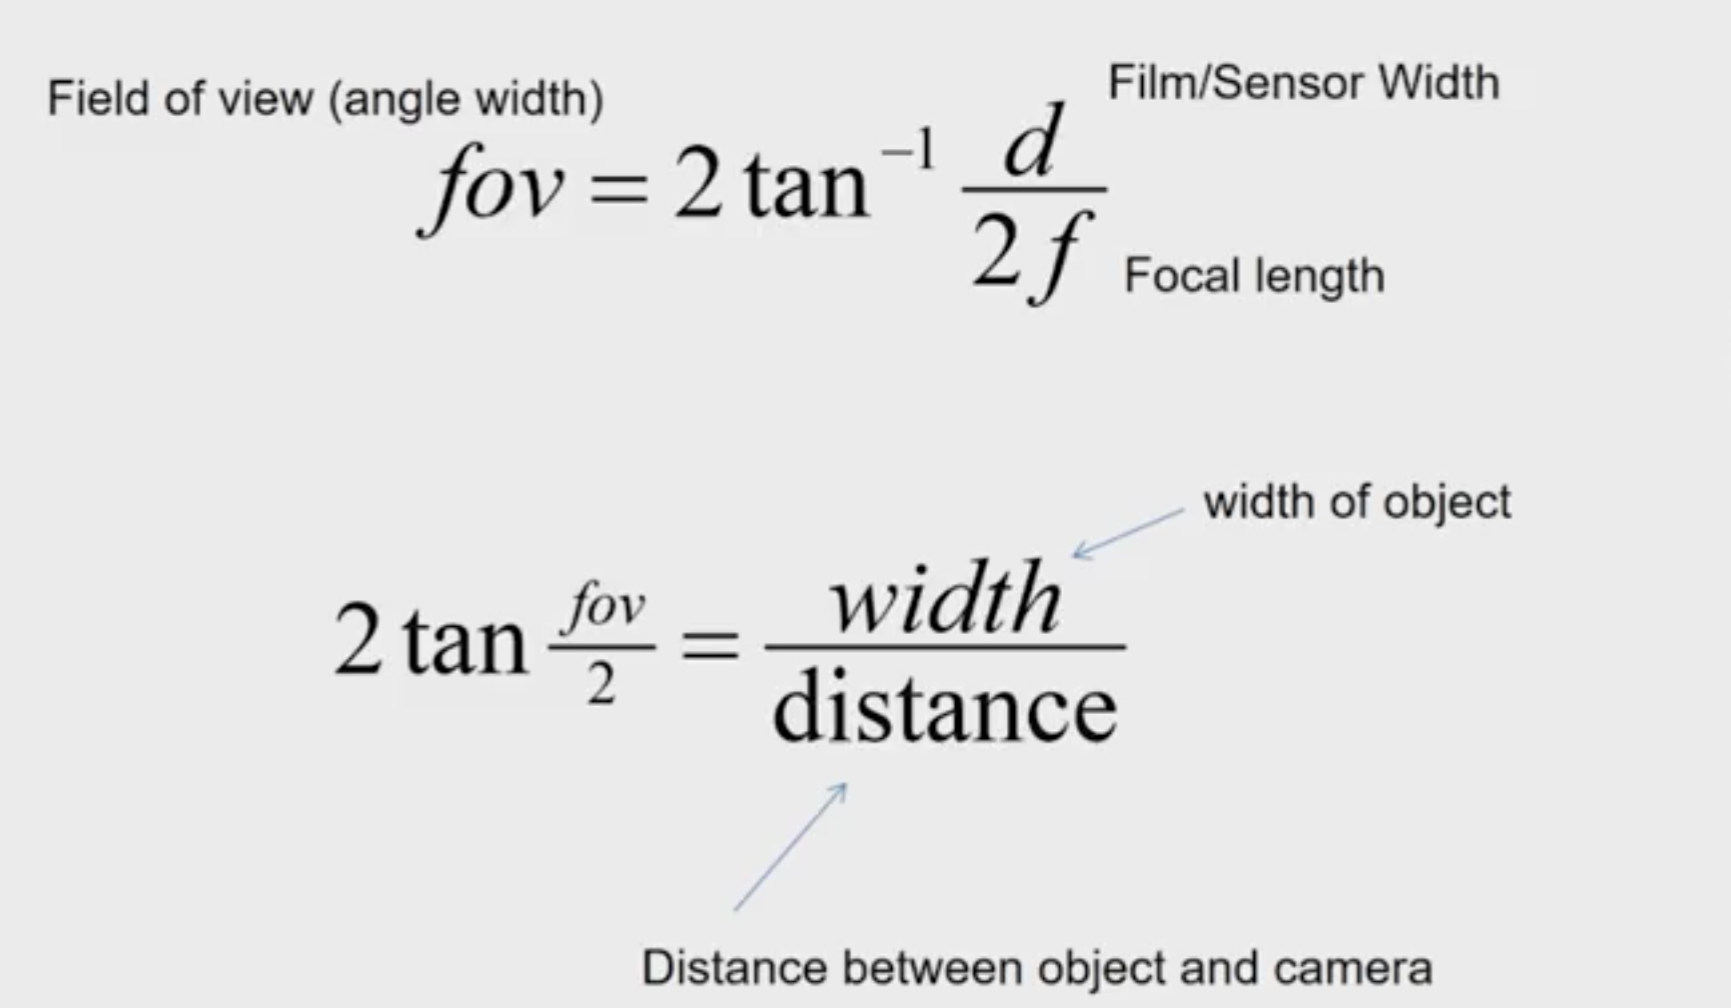
  - can be done with these two equations ^
- How to create 3D models of a scene from an image?
  - The challenge
    - one 2d image could be generated by an infinite number of 3d geometries
  - The solution: making simplifying assumptions about 3d geometry (likely real 3d representations vs unlikely)
  - Two models:
    - box with frontal billboards
    - ground plane + non-frontal billboards
  - "Tour into the picture" (Horry et al.)
    - create a 3d theatre stage of five planes
    - specify foreground objects through bounding polygons
    - use camera transformations to navigate through the scene
  - the idea ^:
    - many scenes can be represented as an axis
    - key assumptions
      - all the walls are orthogonal
      - camera view plane is paralell to back of volume (we are looking straight into the back of the box)
      - 3 vanishing points
      - 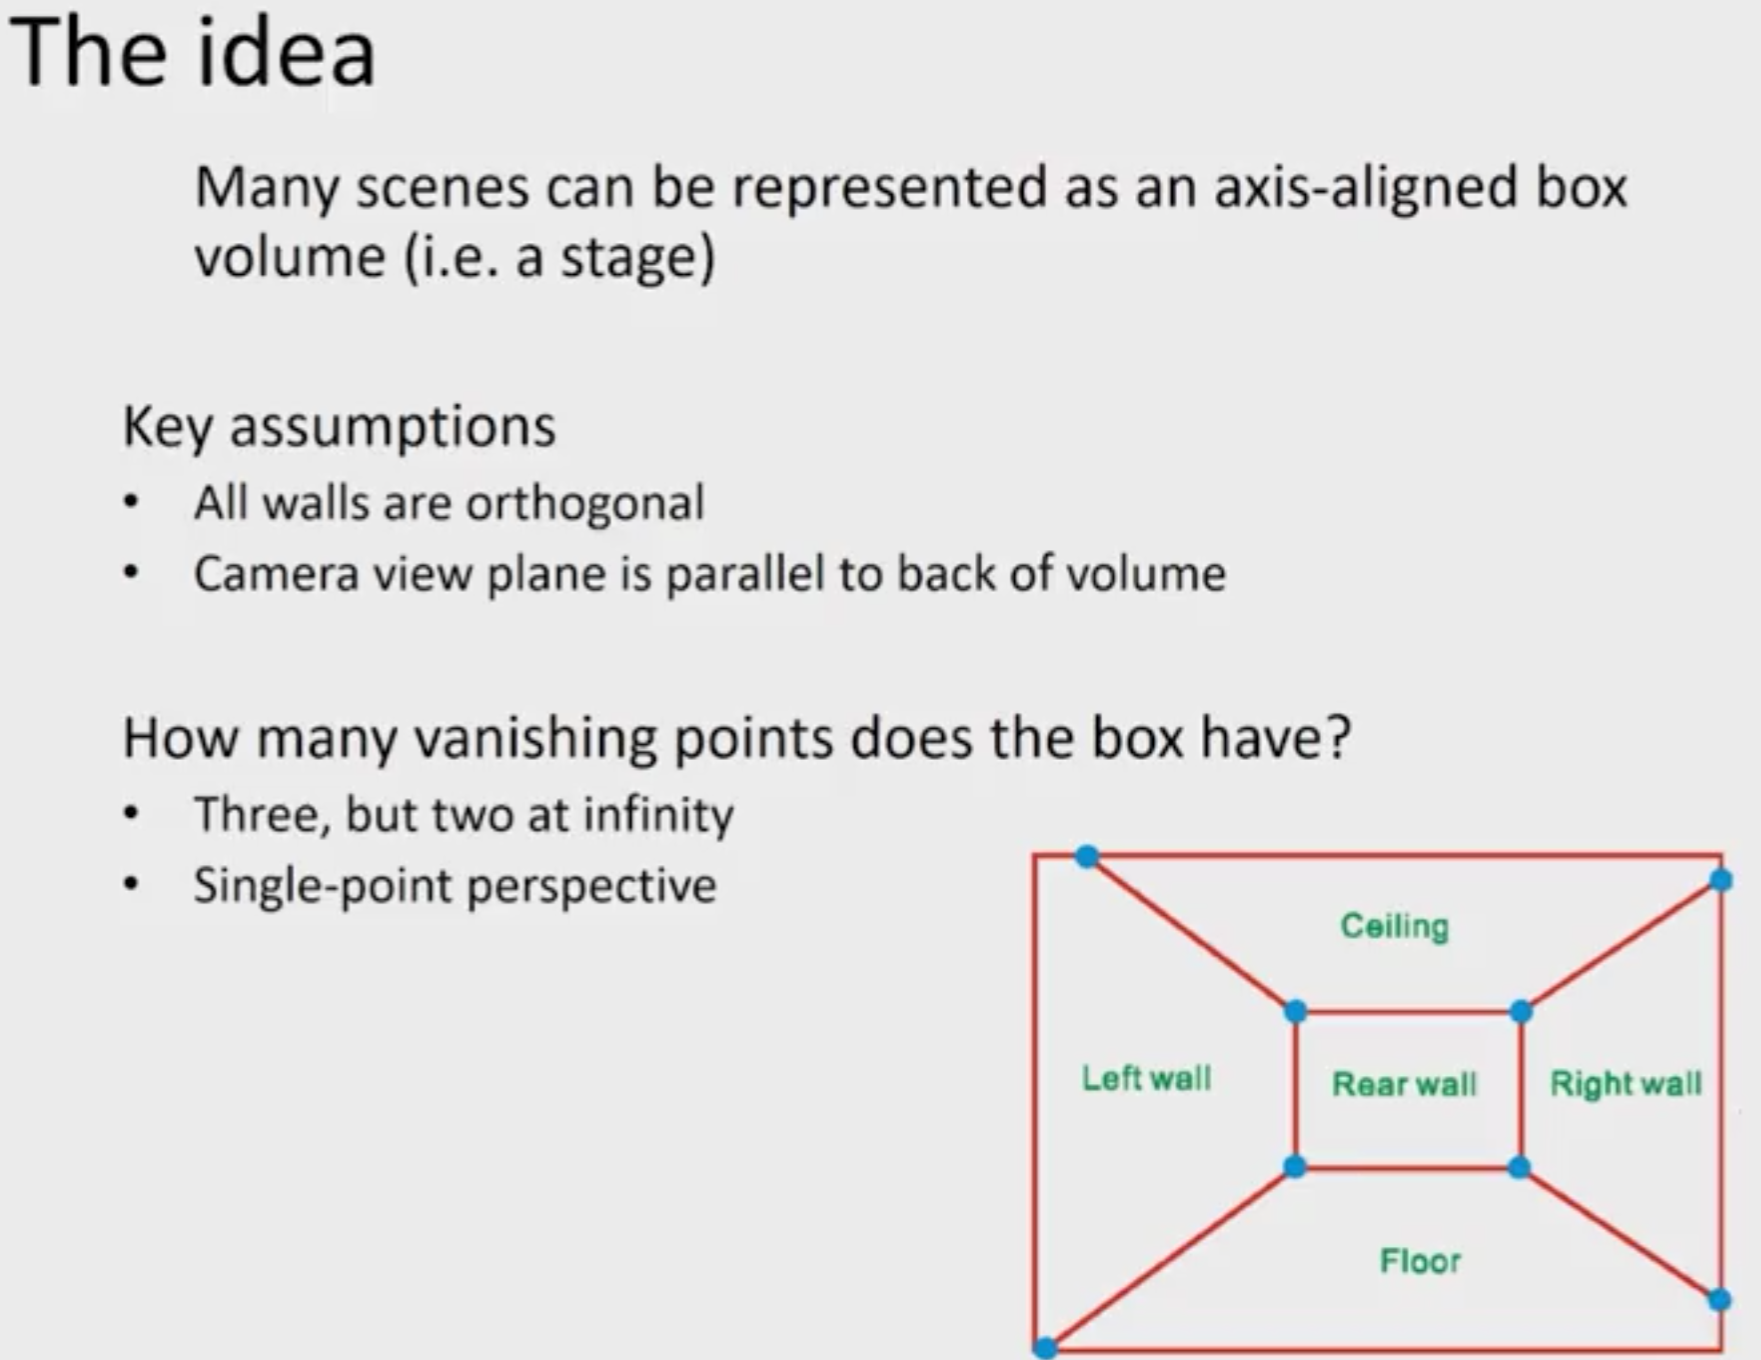
      - Step 1: specificy the scene geometry
        - user controls the inner box and the vanishing point placement (# of DOF?)
        - less DOF = easier to set parameters by hand or with ML
        - less DOF = more limited the number of scenes you can model
        - If we assume the camera is looking straight at the back wall, what camera parameters does the vanishing point position provide?
        - moving vanishing point = moving eyes of viewer (squatting down, maybe)
        - moving vanishing point? changing rotation of the camera
        - 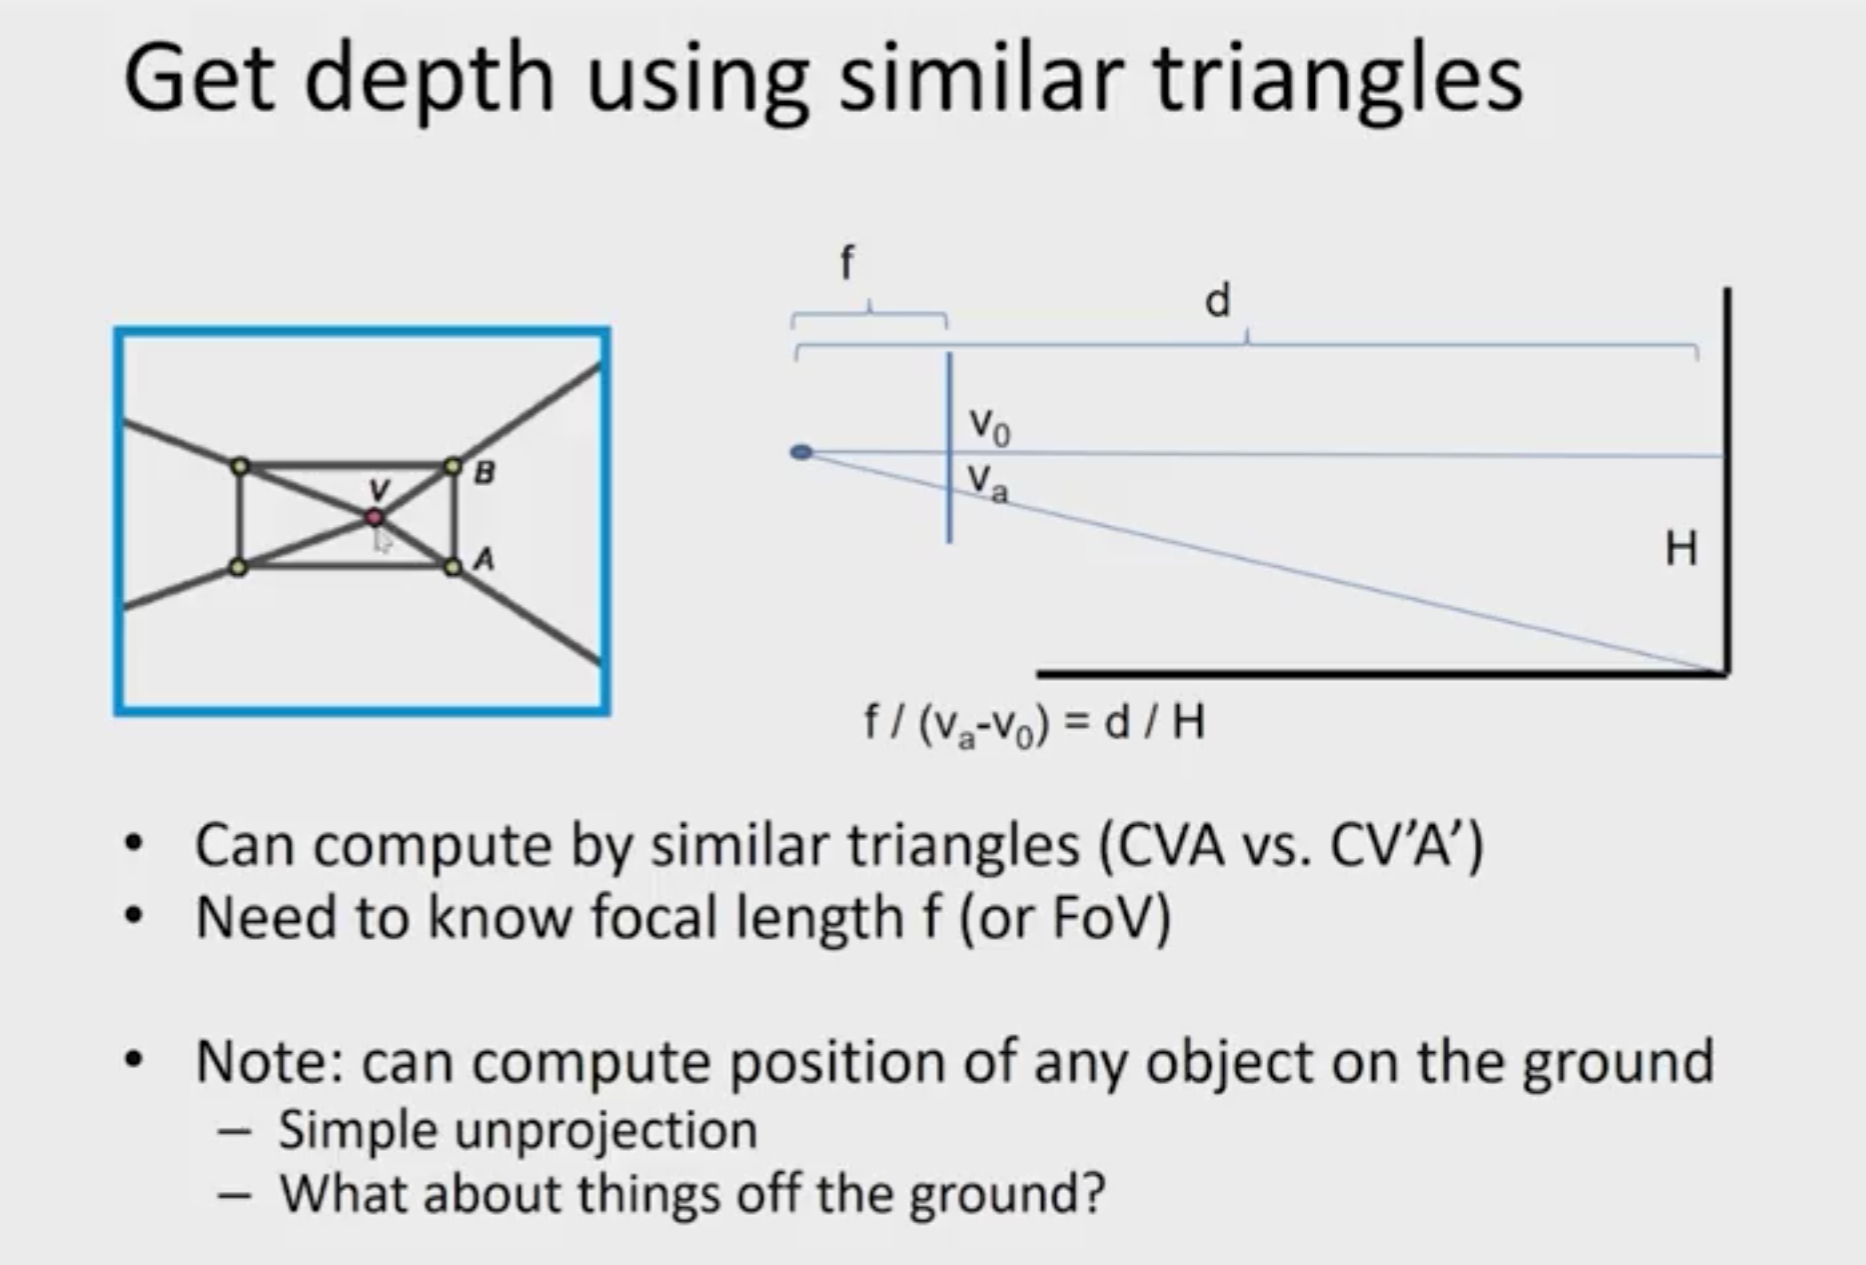
      - Step 2:
        - 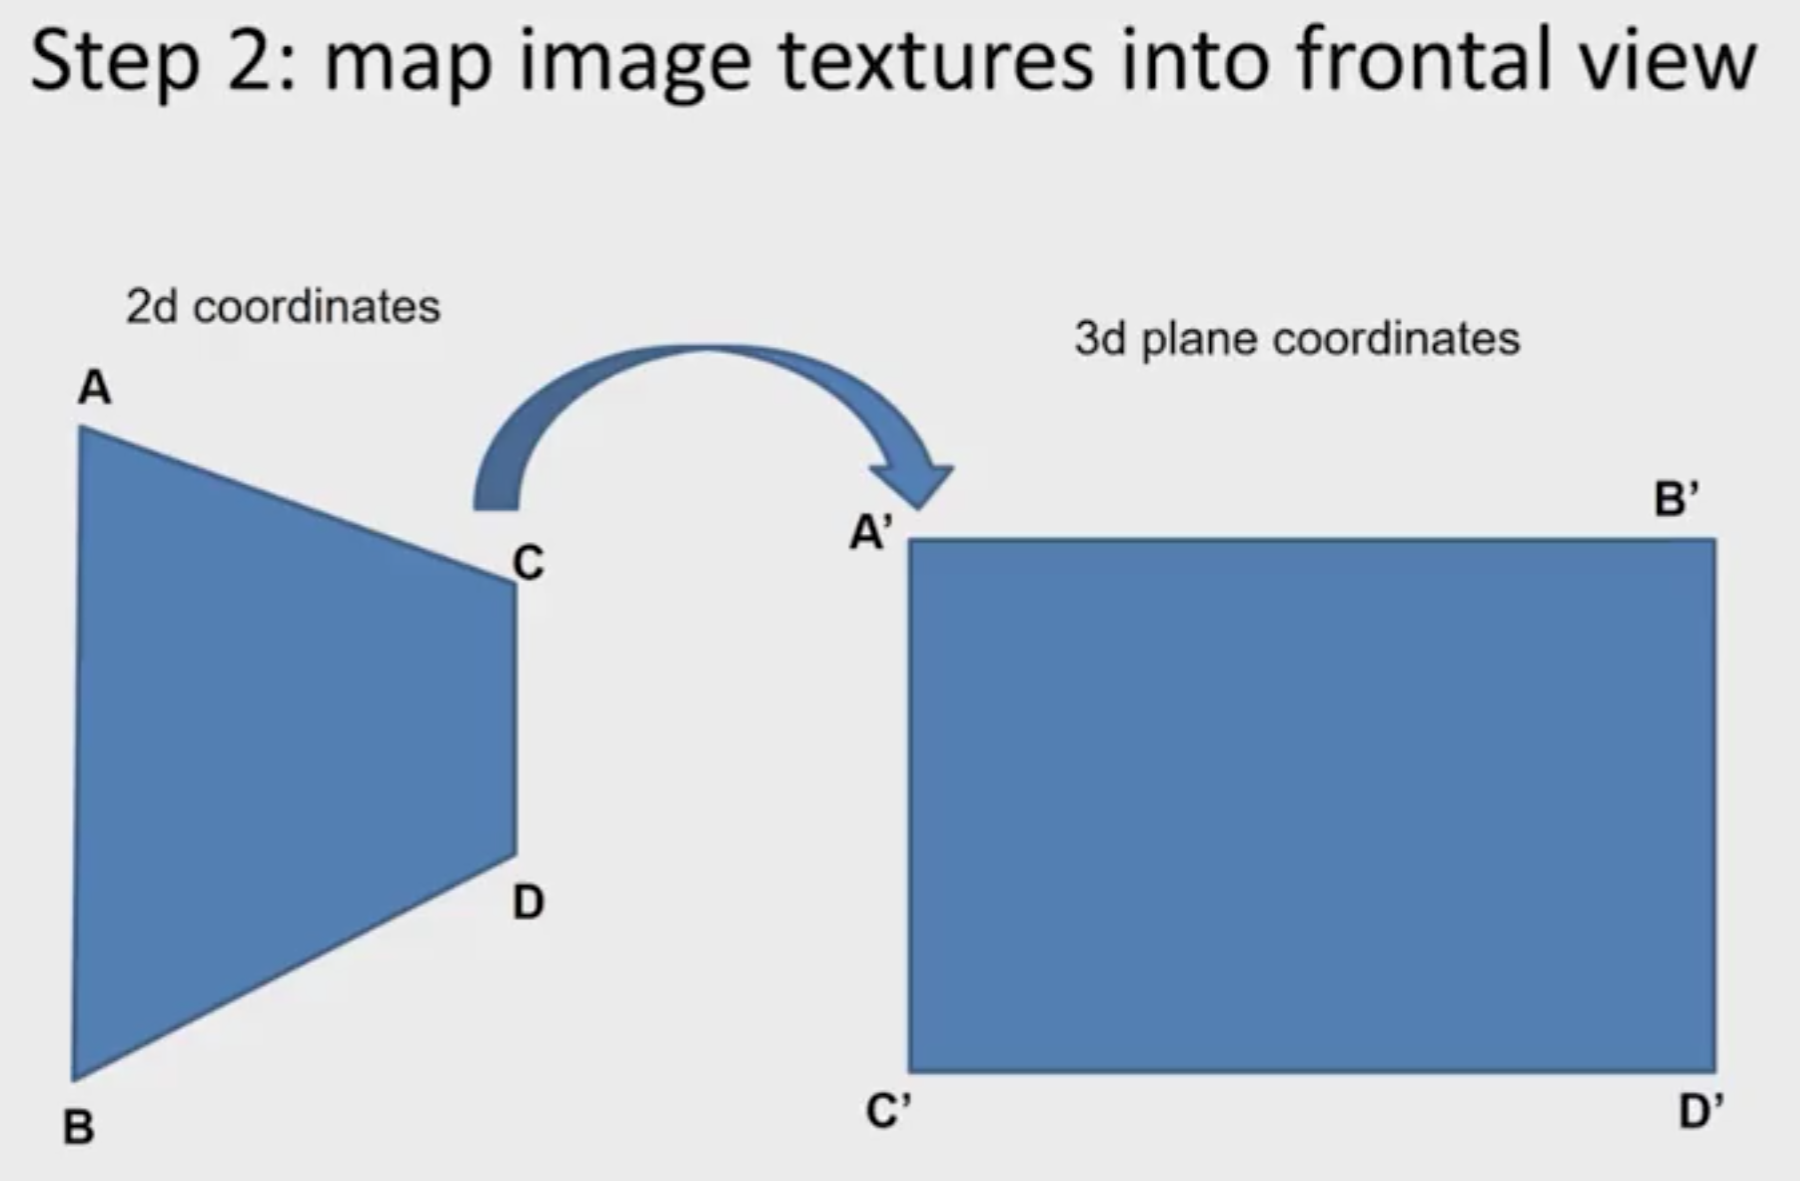
        - image rectification by homography